# DATA ANALYSIS

## 1. Ý nghĩa của thuộc tính:
- **Country**: Tên quốc gia
- Total Cases: Tổng số ca nhiễm
- New Cases: Số ca nhiễm mới
- Total Deaths: Tổng số ca tử vong
- New Deaths: Số ca tử vong mới
- Total Recovered: Tổng số ca hồi phục
- New Recovered: Số ca hồi phục mới
- Active Cases: Tổng số ca đang điều trị
- Serious, Critical: Số ca nghiêm trọng, nguy kịch
- Tot Cases/1M pop: Số ca nhiễm trên 1 triệu dân
- Deaths/1M pop: Số ca tử vong trên 1 triệu dân
- Total tests: Tổng số lần test
- Tests/1M pop: Số lần test trên 1 triệu dân
- Population: Dân số
- Continent: Châu lục
- 1 Case every X ppl: 1 ca nhiễm trên X dân
- 1 Death every X ppl: 1 ca tử vong trên X dân
- 1 Test every X ppl: 1 lần test trên X dân
- New Cases/1M pop: Số ca nhiễm mới trên 1 triệu dân
- New Deaths/1M pop: Số ca tử vong mới trên 1 triệu dân
- Active Cases/1M pop: Số ca đang điều trị trên 1 triệu dân

## 2. Phân tích các mối quan hệ nhờ trực quan

In [40]:
# Import thư viện: 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

In [2]:
# Đọc dữ liệu:
covid_df = pd.read_csv('../data/modified/Modified_March_06_2023_corona_data.csv')
covid_df.head(5)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,...,Total tests,Tests/1M pop,Population,Continent,1 Case every X ppl,1 Death every X ppl,1 Test every X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,USA,105396817.0,0.0,1146740.0,0.0,102864696.0,0.0,1385381.0,2726.0,314800.0,...,1.167686e+09,3487657.0,3.348053e+08,North America,3.0,292.0,0.0,0.0,0.0,4138.0
1,India,44688101.0,0.0,530775.0,0.0,44154425.0,0.0,2901.0,0.0,31770.0,...,9.191891e+08,653468.0,1.406632e+09,Asia,31.0,2650.0,2.0,0.0,0.0,2.0
2,France,39638159.0,0.0,165030.0,0.0,39400459.0,706.0,72670.0,869.0,604383.0,...,2.714902e+08,4139547.0,6.558452e+07,Europe,2.0,397.0,0.0,0.0,0.0,1108.0
3,Germany,38210850.0,0.0,168397.0,0.0,37767300.0,17500.0,275153.0,0.0,455522.0,...,1.223324e+08,1458359.0,8.388360e+07,Europe,2.0,498.0,1.0,0.0,0.0,3280.0
4,Brazil,37076053.0,0.0,699276.0,0.0,36249161.0,0.0,127616.0,0.0,172164.0,...,6.377617e+07,296146.0,2.153536e+08,South America,6.0,308.0,3.0,0.0,0.0,593.0


In [193]:
# Define the custom formatting function
def format_y_axis(value, pos=0):
    if value >= 1_000_000_000:
        return f"{value/1_000_000_000:.1f}B"
    if value >= 1_000_000:
        return f"{value/1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value/1_000:.1f}K"
    else:
        return f"{value:.0f}"

# Tương quan về tổng số ca nhiễm và tổng số ca test trên toàn thế giới

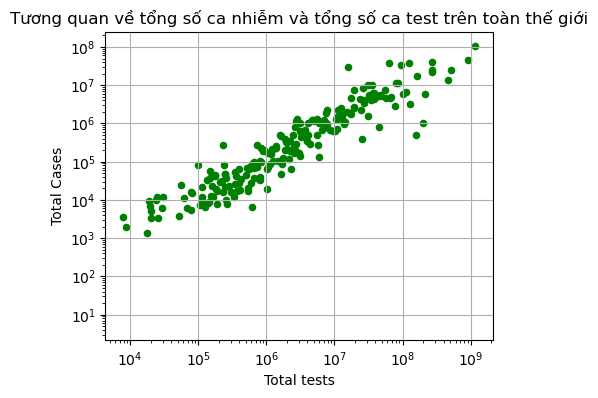

In [214]:
fig, ax = plt.subplots()
ax.set_title("Tương quan về tổng số ca nhiễm và tổng số ca test trên toàn thế giới")
covid_df[['Total Cases', 'Total tests']].plot.scatter(x='Total tests', y='Total Cases', ax=ax, color='green', figsize=(5, 4))

ax.grid()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

plt.xscale('log')
plt.yscale('log')
plt.show()

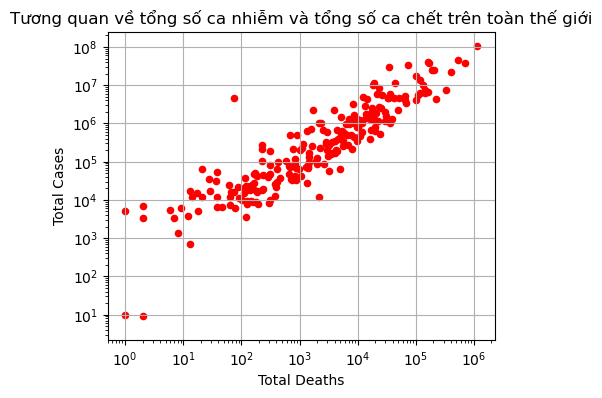

In [218]:
fig, ax = plt.subplots()
ax.set_title("Tương quan về tổng số ca nhiễm và tổng số ca chết trên toàn thế giới")
covid_df[['Total Cases', 'Total Deaths']].plot.scatter(x='Total Deaths', y='Total Cases', ax=ax, color='red', figsize=(5, 4))

ax.grid()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

plt.xscale('log')
plt.yscale('log')
plt.show()

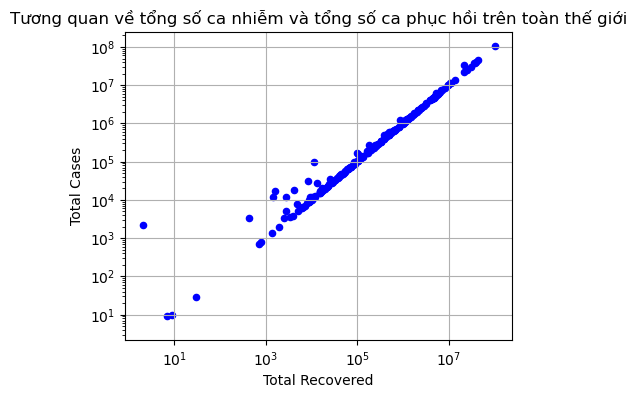

In [219]:
fig, ax = plt.subplots()
ax.set_title("Tương quan về tổng số ca nhiễm và tổng số ca phục hồi trên toàn thế giới")
covid_df[['Total Cases', 'Total Recovered']].plot.scatter(x='Total Recovered', y='Total Cases', ax=ax, color='blue', figsize=(5, 4))

ax.grid()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

plt.xscale('log')
plt.yscale('log')
plt.show()

# Top 10 quốc gia có tỉ lệ 1 ca nhiễm trên số người ít nhất

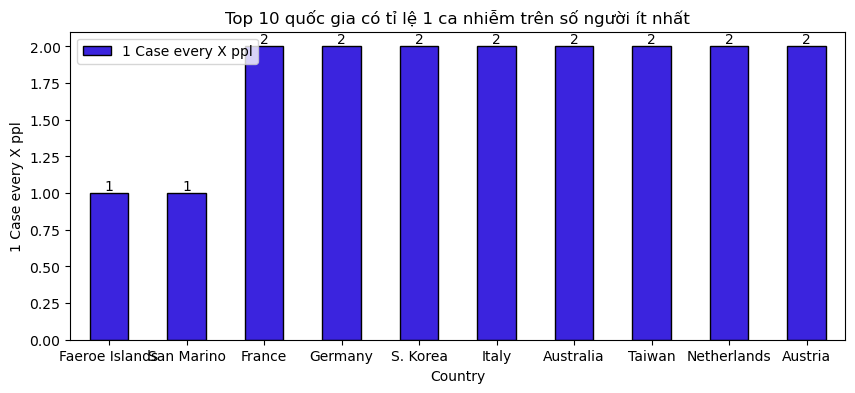

In [151]:
fig, ax = plt.subplots()
ax.set_title("Top 10 quốc gia có tỉ lệ 1 ca nhiễm trên số người ít nhất")
covid_df.drop(covid_df[covid_df['1 Case every X ppl'] == 0].index)[['Country', '1 Case every X ppl']].nsmallest(n=10, columns=['1 Case every X ppl']).plot(
    kind="bar",
    color=(0.23, 0.14, 0.87),
    figsize=(10, 4),
    x='Country',
    xlabel="Country",
    ylabel='1 Case every X ppl',
    fontsize=10, ax=ax,
    edgecolor="black"
)

ax.bar_label(
    ax.containers[0],
    fontsize=10,
)

ax.xaxis.set_tick_params(rotation=0)
plt.show()

# Top 10 quốc gia có tỉ lệ 1 ca chết trên số người ít nhất

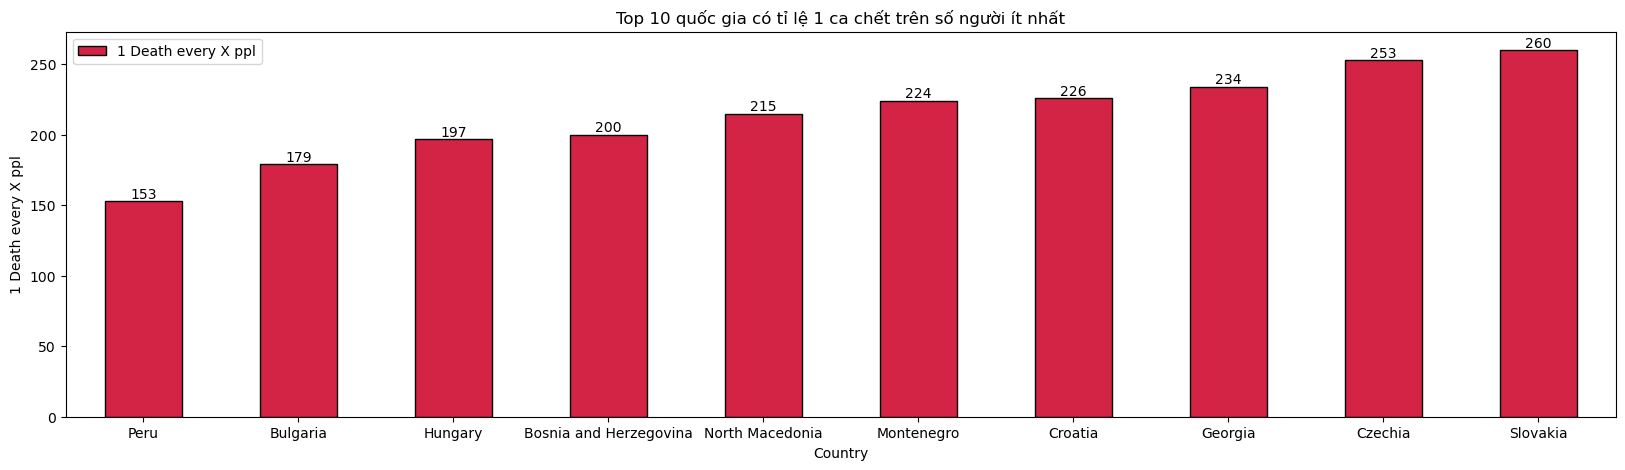

In [146]:
fig, ax = plt.subplots()
ax.set_title("Top 10 quốc gia có tỉ lệ 1 ca chết trên số người ít nhất")
covid_df.drop(covid_df[covid_df['1 Death every X ppl'] == 0].index)[['Country', '1 Death every X ppl']].nsmallest(n=10, columns=['1 Death every X ppl']).plot(
    kind="bar",
    color=(0.83, 0.14, 0.27),
    figsize=(20, 5),
    x='Country',
    xlabel="Country",
    ylabel='1 Death every X ppl',
    fontsize=10, ax=ax,
    edgecolor="black"
)

ax.bar_label(
    ax.containers[0],
    fontsize=10,
)

ax.xaxis.set_tick_params(rotation=0)
plt.show()

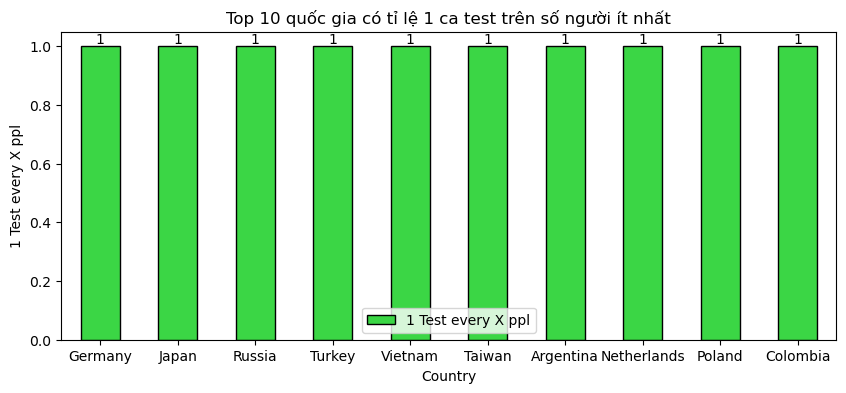

In [150]:
fig, ax = plt.subplots()
ax.set_title("Top 10 quốc gia có tỉ lệ 1 ca test trên số người ít nhất")
covid_df.drop(covid_df[covid_df['1 Test every X ppl'] == 0].index)[['Country', '1 Test every X ppl']].nsmallest(n=10, columns=['1 Test every X ppl']).plot(
    kind="bar",
    color=(0.23, 0.84, 0.27),
    figsize=(10, 4),
    x='Country',
    xlabel="Country",
    ylabel='1 Test every X ppl',
    fontsize=10, ax=ax,
    edgecolor="black"
)

ax.bar_label(
    ax.containers[0],
    fontsize=10,
)

ax.xaxis.set_tick_params(rotation=0)
plt.show()

# Tổng số ca nhiễm theo từng châu lục

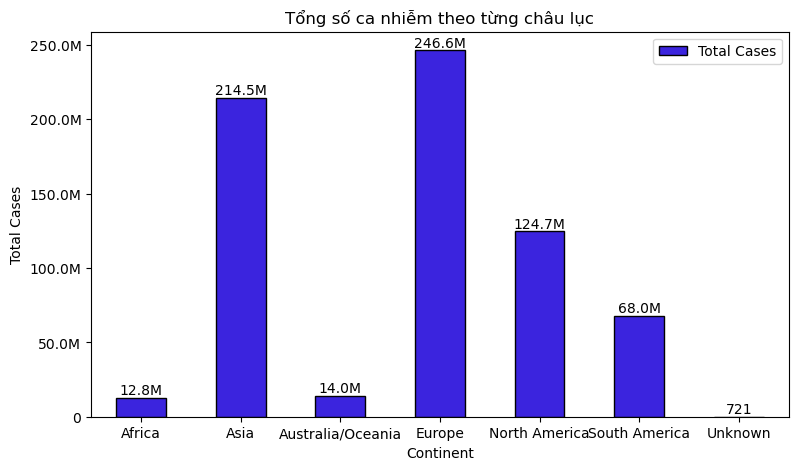

In [194]:
continent_total_cases = pd.DataFrame(covid_df.groupby(["Continent"])["Total Cases"].agg(sum))

fig, ax = plt.subplots()
continent_total_cases.plot(
    kind="bar",
    color=(0.23, 0.14, 0.87),
    figsize=(9, 5), 
    xlabel="Continent",
    ylabel="Total Cases",
    fontsize=10, ax=ax,
    edgecolor="black"
)

ax.bar_label(
    ax.containers[0],
    fontsize=10,
    labels=[format_y_axis(x) for x in continent_total_cases.iloc[:, 0]], 
    label_type="edge",
)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
ax.xaxis.set_tick_params(rotation=0)
ax.set_title("Tổng số ca nhiễm theo từng châu lục")
plt.show()

# Tổng số ca chết theo từng châu lục

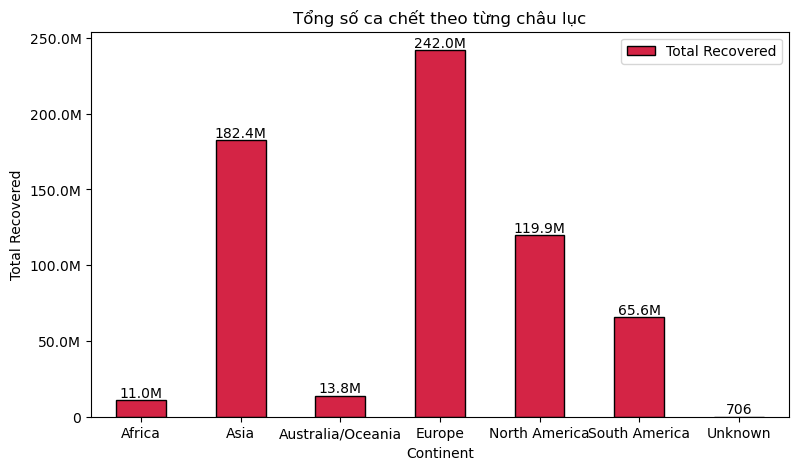

In [195]:
continent_total_cases = pd.DataFrame(covid_df.groupby(["Continent"])["Total Recovered"].agg(sum))

fig, ax = plt.subplots()
continent_total_cases.plot(
    kind="bar",
    color=(0.83, 0.14, 0.27),
    figsize=(9, 5), 
    xlabel="Continent",
    ylabel="Total Recovered",
    fontsize=10, ax=ax,
    edgecolor="black"
)

ax.bar_label(
    ax.containers[0],
    fontsize=10,
    labels=[format_y_axis(x) for x in continent_total_cases.iloc[:, 0]], 
    label_type="edge",
)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
ax.xaxis.set_tick_params(rotation=0)
ax.set_title("Tổng số ca chết theo từng châu lục")
plt.show()

# Tổng số ca phục hồi theo từng châu lục

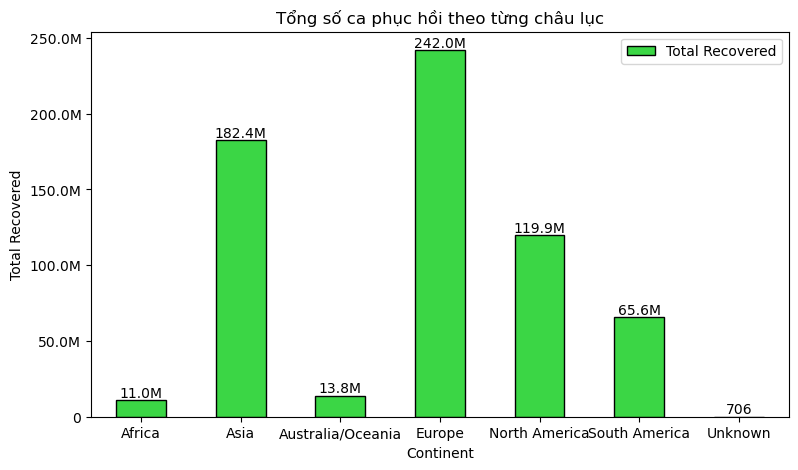

In [196]:
continent_total_cases = pd.DataFrame(covid_df.groupby(["Continent"])["Total Recovered"].agg(sum))

fig, ax = plt.subplots()
continent_total_cases.plot(
    kind="bar",
    color=(0.23, 0.84, 0.27),
    figsize=(9, 5), 
    xlabel="Continent",
    ylabel="Total Recovered",
    fontsize=10, ax=ax,
    edgecolor="black",
)

ax.bar_label(
    ax.containers[0],
    fontsize=10,
    labels=[format_y_axis(x) for x in continent_total_cases.iloc[:, 0]], 
    label_type="edge",
)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
ax.xaxis.set_tick_params(rotation=0)
ax.set_title("Tổng số ca phục hồi theo từng châu lục")
plt.show()

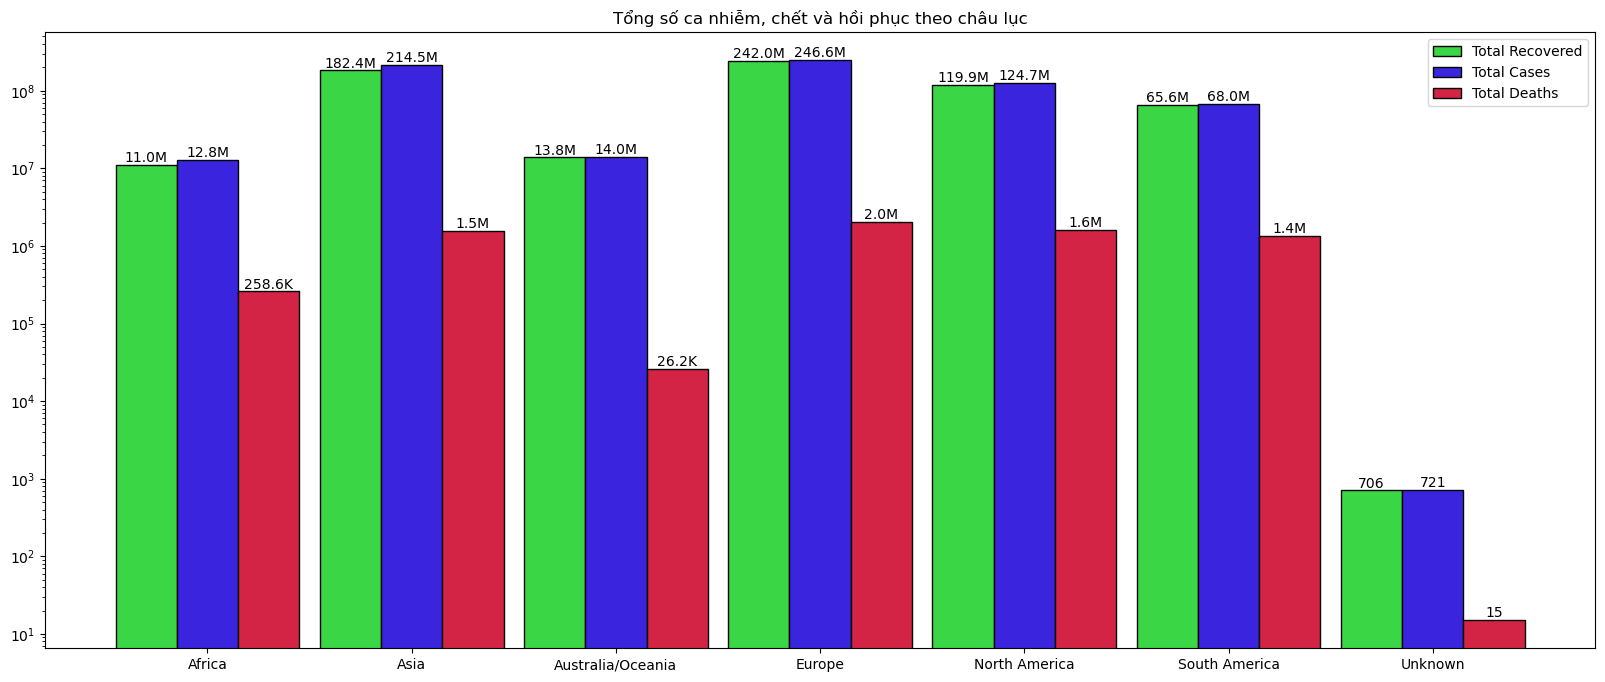

In [197]:
fig, ax = plt.subplots(1,1, figsize = (20, 8))
width = 0.3

recover = pd.DataFrame(covid_df.groupby(["Continent"])["Total Recovered"].agg(sum))
cases = pd.DataFrame(covid_df.groupby(["Continent"])["Total Cases"].agg(sum))
deaths = pd.DataFrame(covid_df.groupby(["Continent"])["Total Deaths"].agg(sum))

continent = cases["Total Cases"].keys()
x = np.arange(len(continent))
ax.set_xticks(x)
ax.set_xticklabels(continent)

ax.set_title("Tổng số ca nhiễm, chết và hồi phục theo châu lục")
rect1 = ax.bar(
    x - width,
    recover["Total Recovered"].values,
    width = width, 
    label = 'Total Recovered',
    edgecolor = "black",
    color = (0.23, 0.84, 0.27),
)

ax.bar_label(
    ax.containers[0],
    fontsize=10,
    labels=[format_y_axis(x) for x in recover["Total Recovered"].values], 
    label_type="edge",
)

rect2 = ax.bar(
    x,
    cases["Total Cases"].values,
    width = width, 
    label = 'Total Cases',
    edgecolor = "black",
    color = (0.23, 0.14, 0.87)
)

ax.bar_label(
    ax.containers[1],
    fontsize=10,
    labels=[format_y_axis(x) for x in cases["Total Cases"].values], 
    label_type="edge",
)

rect3 = ax.bar(
    x + width,
    deaths["Total Deaths"].values,
    width = width, 
    label = 'Total Deaths',
    edgecolor = "black",
    color = (0.83, 0.14, 0.27)
)

ax.bar_label(
    ax.containers[2],
    fontsize=10,
    labels=[format_y_axis(x) for x in deaths["Total Deaths"].values], 
    label_type="edge",
)

ax.legend(["Total Recovered", "Total Cases", "Total Deaths"])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
plt.yscale('log')

plt.show()

# Số ca nhiễm mới, ca chết mới và hồi phục mới theo châu lục

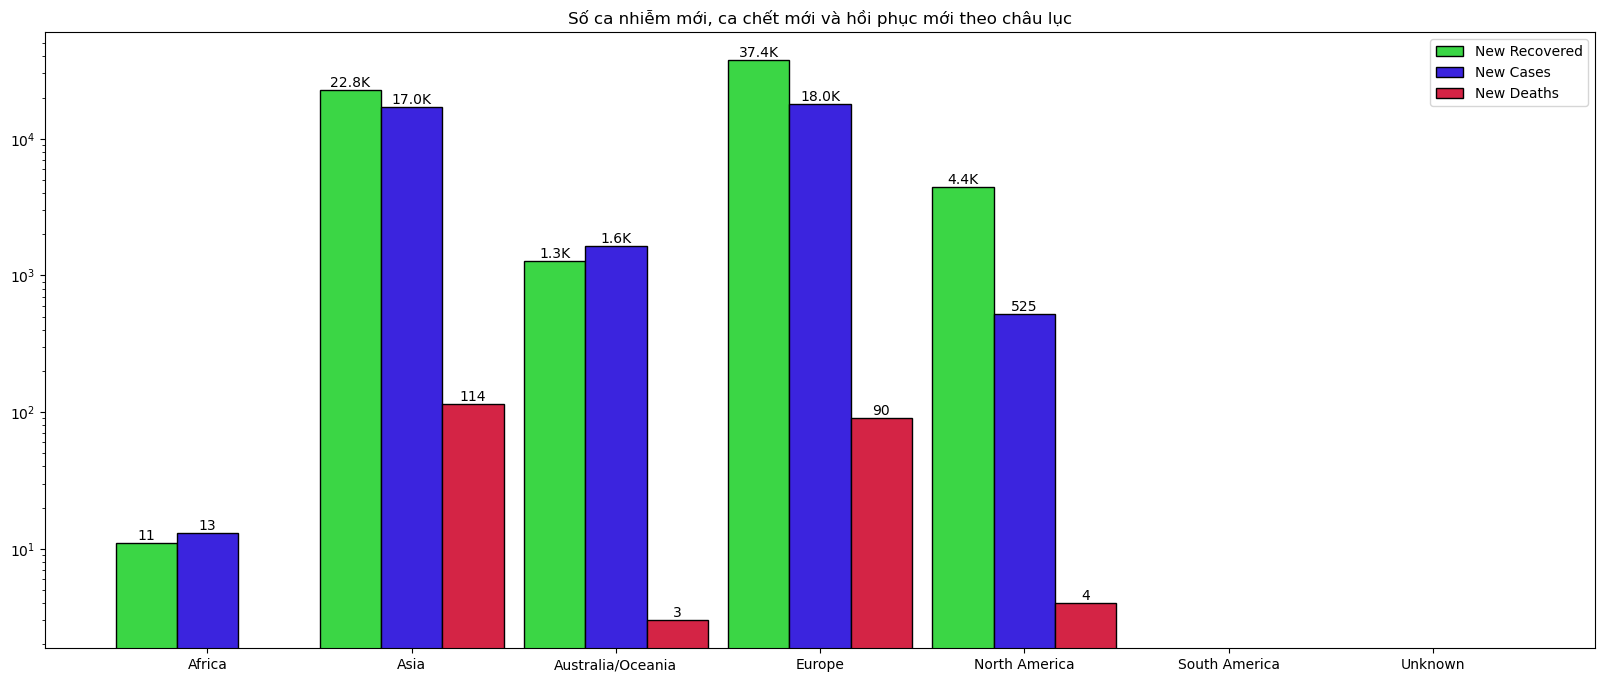

In [198]:
fig, ax = plt.subplots(1,1, figsize = (20, 8))
width = 0.3

recover = pd.DataFrame(covid_df.groupby(["Continent"])["New Recovered"].agg(sum))
cases = pd.DataFrame(covid_df.groupby(["Continent"])["New Cases"].agg(sum))
deaths = pd.DataFrame(covid_df.groupby(["Continent"])["New Deaths"].agg(sum))

continent = cases["New Cases"].keys()
x = np.arange(len(continent))
ax.set_xticks(x)
ax.set_xticklabels(continent)

ax.set_title("Số ca nhiễm mới, ca chết mới và hồi phục mới theo châu lục")
rect1 = ax.bar(
    x - width,
    recover["New Recovered"].values,
    width = width, 
    label = 'New Recovered',
    edgecolor = "black",
    color = (0.23, 0.84, 0.27),
)

ax.bar_label(
    ax.containers[0],
    fontsize=10,
    labels=[format_y_axis(x) for x in recover["New Recovered"].values], 
    label_type="edge",
)

rect2 = ax.bar(
    x,
    cases["New Cases"].values,
    width = width, 
    label = 'New Cases',
    edgecolor = "black",
    color = (0.23, 0.14, 0.87)
)

ax.bar_label(
    ax.containers[1],
    fontsize=10,
    labels=[format_y_axis(x) for x in cases["New Cases"].values], 
    label_type="edge",
)

rect3 = ax.bar(
    x + width,
    deaths["New Deaths"].values,
    width = width, 
    label = 'New Deaths',
    edgecolor = "black",
    color = (0.83, 0.14, 0.27)
)

ax.bar_label(
    ax.containers[2],
    fontsize=10,
    labels=[format_y_axis(x) for x in deaths["New Deaths"].values], 
    label_type="edge",
)

ax.legend(["New Recovered", "New Cases", "New Deaths"])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
plt.yscale('log')

plt.show()

# Top 10 quốc gia có số ca phục hồi và ca nhiễm cao nhất

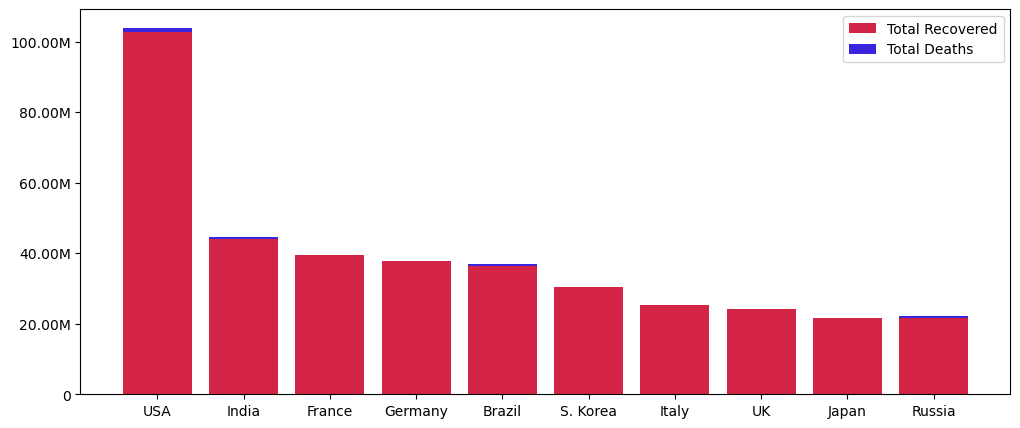

In [38]:
data_1 = covid_df[["Country", "Total Deaths", "Total Recovered"]].nlargest(n=10, columns=["Total Recovered"]).sort_values(ascending=False, by=["Total Recovered"])

fig, ax = plt.subplots(figsize=(12, 5))

ax.set_xticks(range(len(data_1)))
ax.set_xticklabels(data_1['Country'])

ax.bar(range(len(data_1)), data_1['Total Recovered'], color=(0.83, 0.14, 0.27), label='Total Recovered')

ax.bar(range(len(data_1)), data_1['Total Deaths'], color=(0.23, 0.14, 0.87), label='Total Deaths', bottom=data_1['Total Recovered'])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

ax.legend()
plt.show()

# Top 10 quốc gia có số ca nhiễm và phục hồi cao nhất

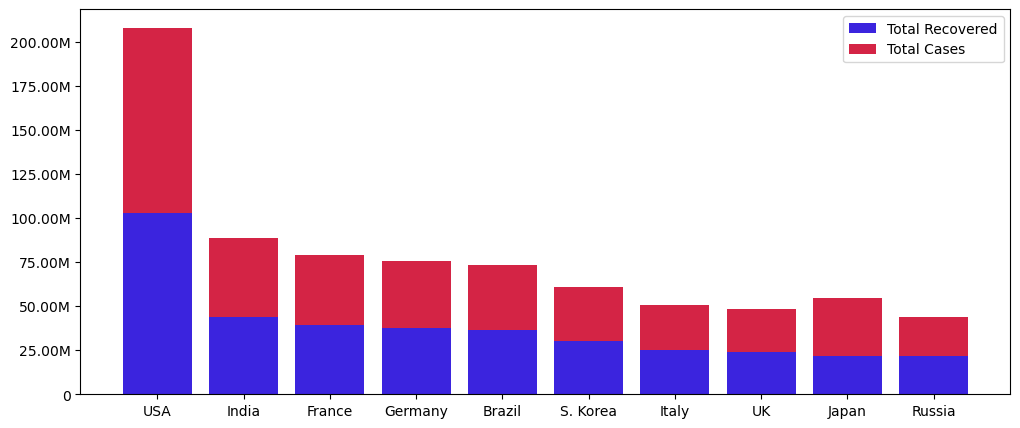

In [39]:
data_2 = covid_df[["Country", "Total Cases", "Total Recovered"]].nlargest(n=10, columns=["Total Recovered"]).sort_values(ascending=False, by=["Total Recovered"])

fig, ax = plt.subplots(figsize=(12, 5))

ax.set_xticks(range(len(data_2)))
ax.set_xticklabels(data_2['Country'])

ax.bar(range(len(data_2)), data_2['Total Recovered'], color=(0.23, 0.14, 0.87), label='Total Recovered')

ax.bar(range(len(data_2)), data_2['Total Cases'], color=(0.83, 0.14, 0.27), label='Total Cases', bottom=data_2['Total Recovered'])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

ax.legend()
plt.show()

In [190]:
b = [covid_df["Population"].sum() - covid_df["Total Cases"].sum(), covid_df["Total Cases"].sum()]
a = [covid_df["Total Cases"].sum() - covid_df["Total Deaths"].sum() - covid_df["Total Recovered"].sum(), covid_df["Total Deaths"].sum(), covid_df["Total Recovered"].sum()]

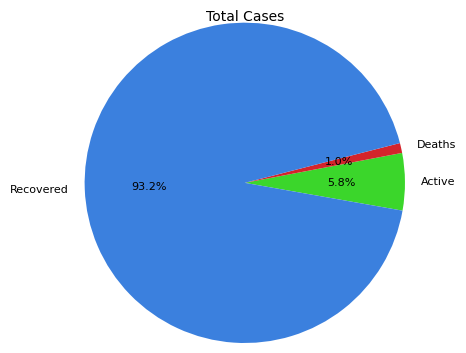

In [192]:
plt.figure(figsize=(8, 4))
plt.title('Total Cases', fontsize=10)
plt.pie(a, 
    labels=["Active", "Deaths", "Recovered"],
    textprops={"fontsize":8},
    radius=1.3, startangle=-10,
    colors=[(0.23, 0.84, 0.17), (0.83, 0.14, 0.17), (0.23, 0.5, 0.87)],
    autopct='%.01f%%',
)
plt.show()

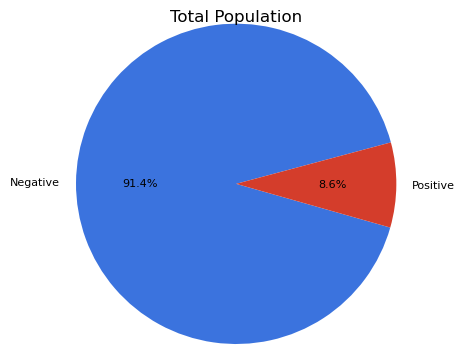

In [191]:
plt.figure(figsize=(8, 4))
plt.title('Total Population', fontsize=12)
plt.pie(b, 
        labels=["Negative", "Positive"],
        textprops={"fontsize":8},
        radius=1.3, startangle=15,
        colors=[(0.23, 0.45, 0.87), (0.83, 0.24, 0.17)],
        autopct='%.01f%%')
plt.show()

---